In [95]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.metrics import accuracy_score
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix,classification_report,roc_curve,roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline


# loading the dataset

In [5]:
df = pd.read_csv("winequality-red.csv")
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [6]:
df['quality'].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [8]:
# defining the rows and columns
df.shape

(1599, 12)

In [9]:
# finding the null values
df.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

### There are no null values

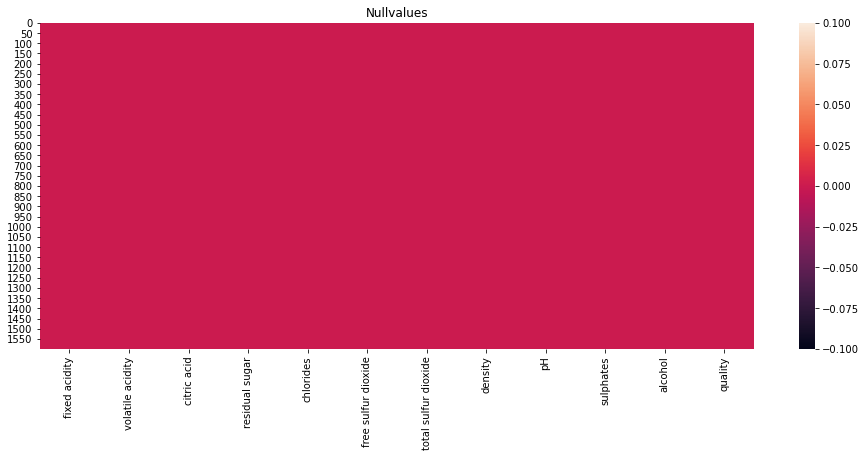

In [10]:
# showing the null values using heatmap
plt.figure(figsize=[16,6])
sns.heatmap(df.isnull())
plt.title("Nullvalues")
plt.show()

In [11]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [12]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


# Data visualisation

## Describing the data with heatmap

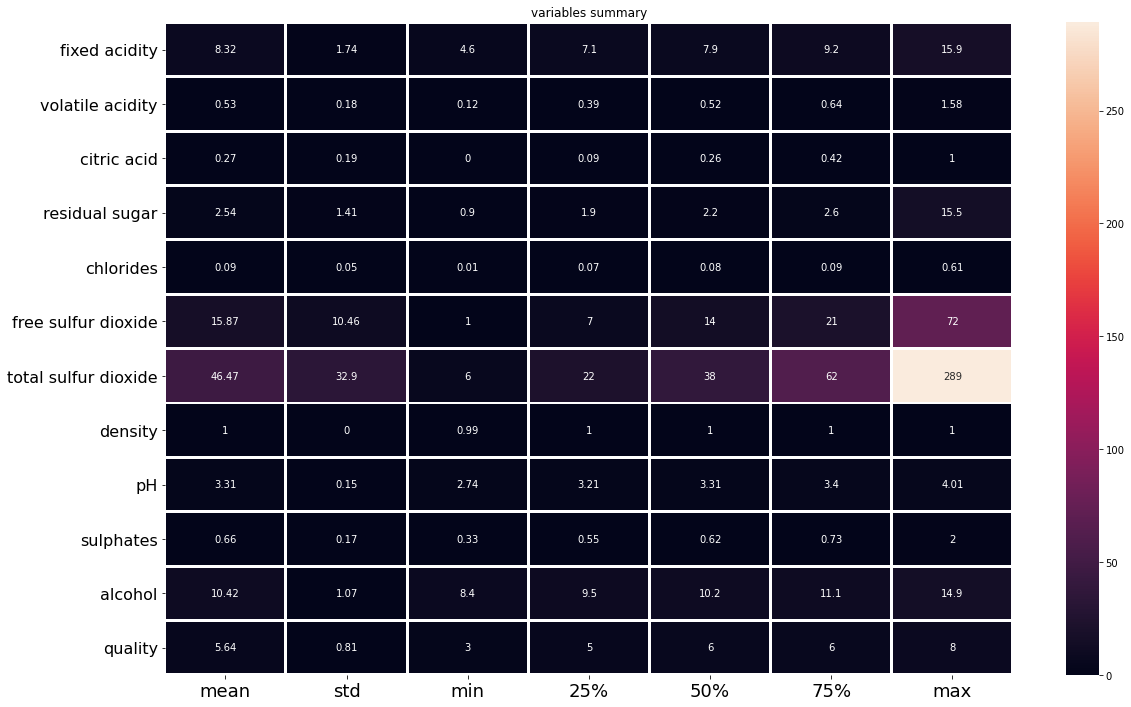

In [13]:
plt.figure(figsize = (19, 12))
sns.heatmap(round(df.describe()[1:].transpose(),2),linewidth=2, annot = True,fmt="g")
plt.xticks(fontsize=18)
plt.yticks(fontsize=16)
plt.title("variables summary")
plt.show()

<AxesSubplot:xlabel='quality', ylabel='fixed acidity'>

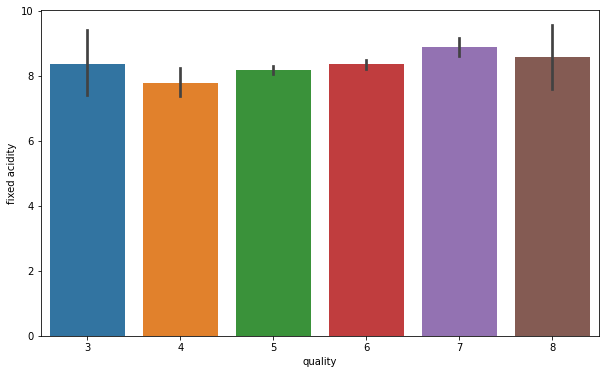

In [14]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'fixed acidity', data = df)

<AxesSubplot:xlabel='quality', ylabel='volatile acidity'>

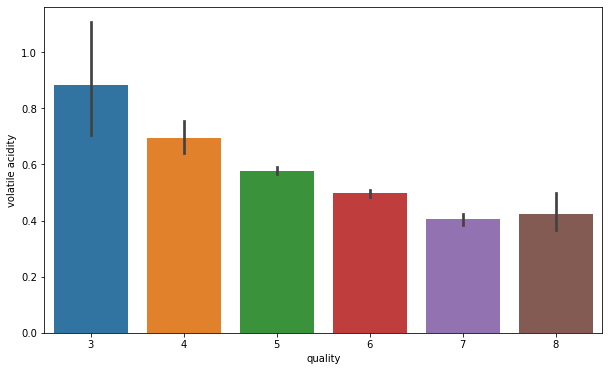

In [15]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'volatile acidity', data = df)

<AxesSubplot:xlabel='quality', ylabel='citric acid'>

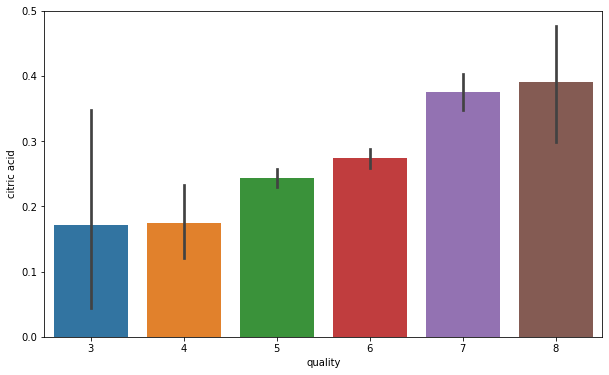

In [16]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'citric acid', data = df)

### citric acid levels are increasing with quality

<AxesSubplot:xlabel='quality', ylabel='residual sugar'>

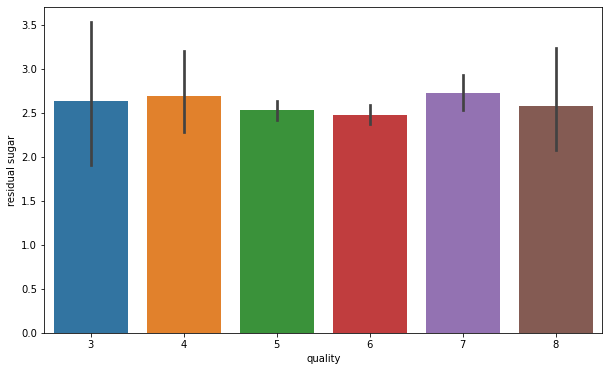

In [17]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'residual sugar', data = df)

<AxesSubplot:xlabel='quality', ylabel='chlorides'>

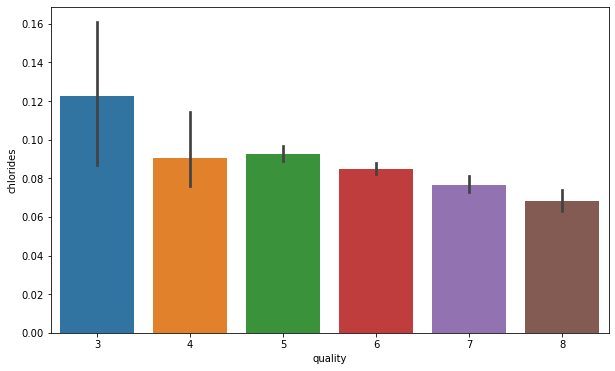

In [18]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'chlorides', data = df)

###  chlorides are becoming low as quality increases

<AxesSubplot:xlabel='quality', ylabel='free sulfur dioxide'>

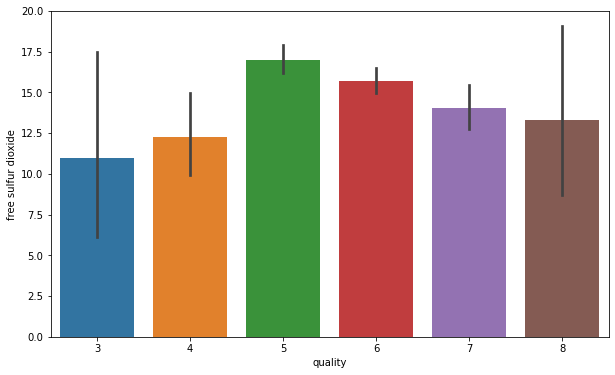

In [19]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'free sulfur dioxide', data = df)

<AxesSubplot:xlabel='quality', ylabel='total sulfur dioxide'>

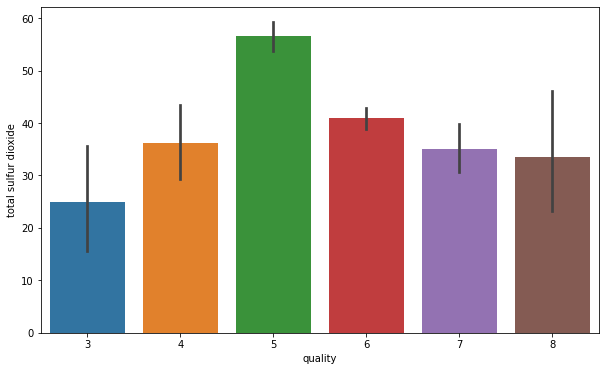

In [20]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'total sulfur dioxide', data = df)

<AxesSubplot:xlabel='quality', ylabel='alcohol'>

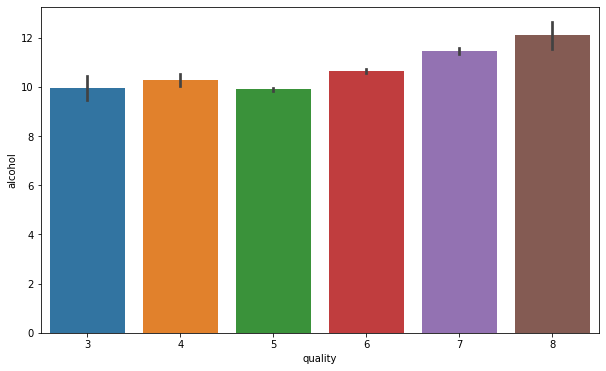

In [21]:

fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'alcohol', data = df)

<AxesSubplot:xlabel='quality', ylabel='sulphates'>

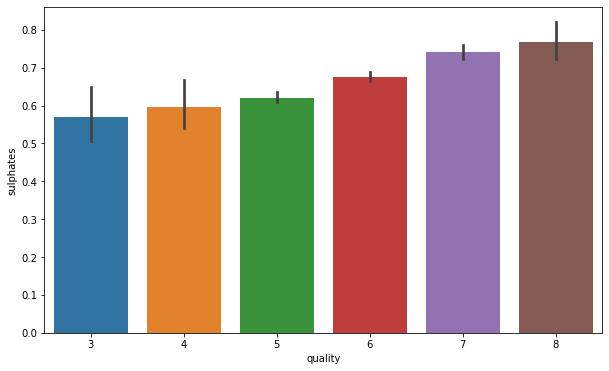

In [22]:

fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'sulphates', data = df)

##### Observations ; sulphur level goes high as the quality goes high

In [23]:
# correlation matrix
df.corr()


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397


# Correlation heatmap 

Text(0.5, 1.0, 'Correlation Heatmap')

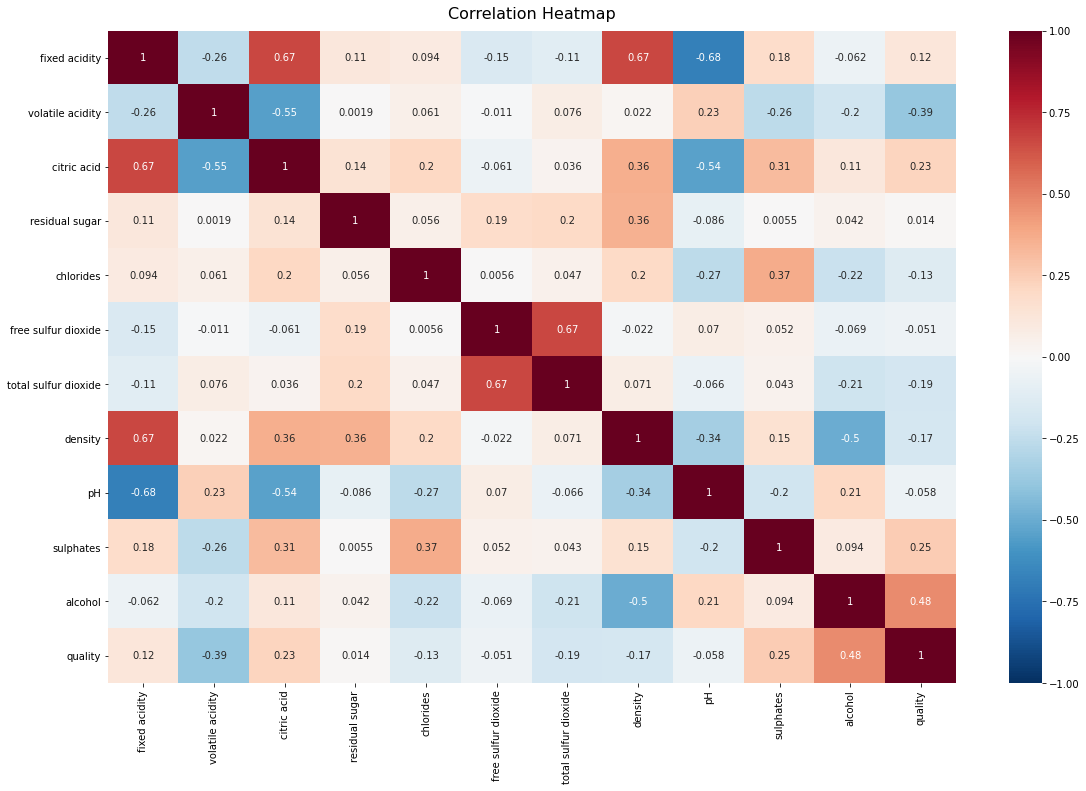

In [24]:
plt.figure(figsize = (19, 12))
heatmap = sns.heatmap(df.corr(), vmin = -1, vmax = 1, cmap='RdBu_r', annot = True)
heatmap.set_title('Correlation Heatmap', fontdict = {'fontsize': 16}, pad = 12)

# The strongly correlated items are :
## 1.fixed acidity and citric acid. 
## 2.free sulphur dioxide and total sulphor dioxide. 
## 3.fixed acidity and density
## 4.alcohol and quality.

# The weekly correlated items are :
## 1.citric acid and volatile acidity. 
## 2.fixed acidity and ph. 
## 3.density and alcohol.

## The quality is mapping with number greater than 6 treated as good and less than 6 is bad

In [25]:
df['quality'] = df['quality'].map({3 : 'bad', 4 :'bad', 5: 'bad',
                                      6: 'good', 7: 'good', 8: 'good'})

In [26]:
df['quality'].value_counts()

good    855
bad     744
Name: quality, dtype: int64

# Label encoder converting numerical values 

In [27]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

df['quality'] = le.fit_transform(df['quality'])

df['quality'].value_counts

<bound method IndexOpsMixin.value_counts of 0       0
1       0
2       0
3       1
4       0
       ..
1594    0
1595    1
1596    1
1597    0
1598    1
Name: quality, Length: 1599, dtype: int32>

In [28]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0


# Distribution plot

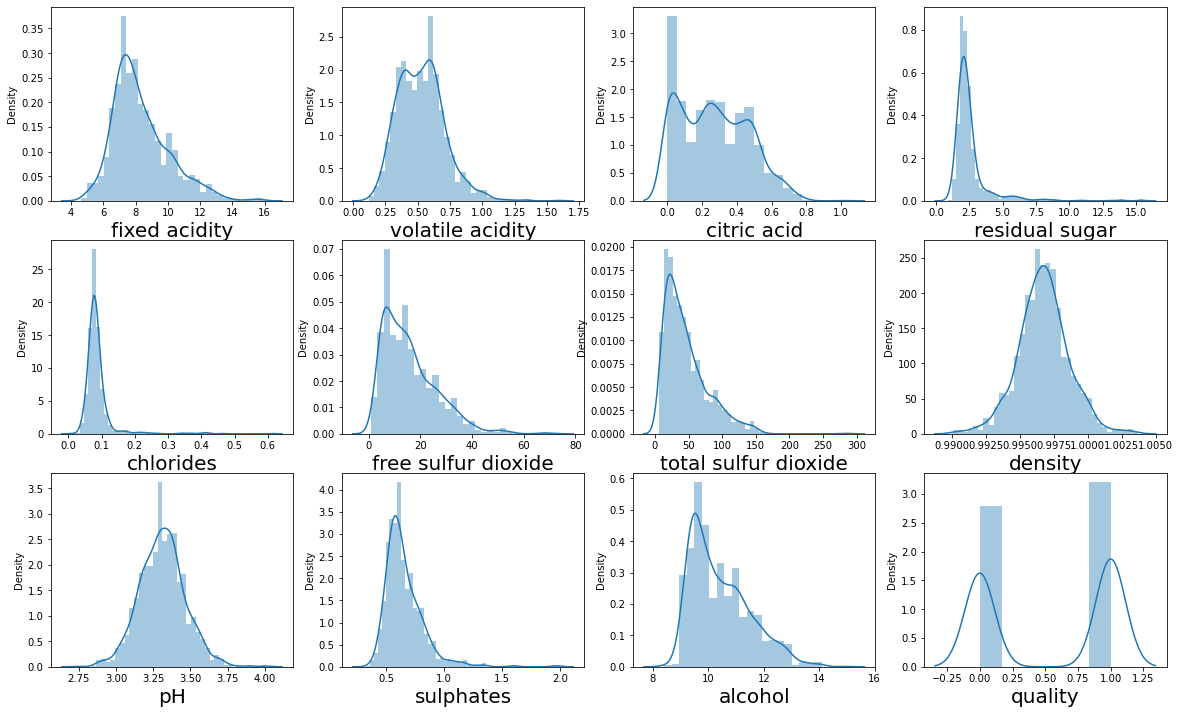

In [29]:
plt.figure(figsize=(20,25),facecolor='white')
plotnumber = 1
for column in df:
    if plotnumber <=24:
        ax = plt.subplot(6,4,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column,fontsize=20)
        plotnumber+=1
plt.show()        

### by observing all are not normally distributed

# Checking the outliers with box plot

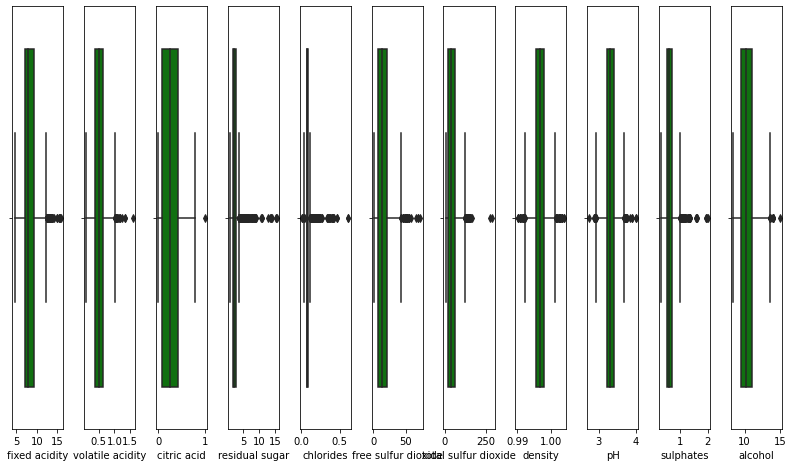

In [30]:
collist=df.columns.values
ncol=30
nrows=14
plt.figure(figsize=(ncol,3*ncol))
for i in range(0,11):
    plt.subplot(nrows,ncol,i+1)
    sns.boxplot(df[collist[i]],color='green',orient='v')
    plt.tight_layout()
    

### outliers are present

In [31]:
# checking the skewness of the data
df.skew()

fixed acidity           0.982751
volatile acidity        0.671593
citric acid             0.318337
residual sugar          4.540655
chlorides               5.680347
free sulfur dioxide     1.250567
total sulfur dioxide    1.515531
density                 0.071288
pH                      0.193683
sulphates               2.428672
alcohol                 0.860829
quality                -0.139303
dtype: float64

In [32]:
# Removing the outliers with zscore
from scipy.stats import zscore
import numpy as np
z= np.abs(zscore(df))
print(z)

[[0.52835961 0.96187667 1.39147228 ... 0.57920652 0.96024611 1.07200445]
 [0.29854743 1.96744245 1.39147228 ... 0.1289504  0.58477711 1.07200445]
 [0.29854743 1.29706527 1.18607043 ... 0.04808883 0.58477711 1.07200445]
 ...
 [1.1603431  0.09955388 0.72391627 ... 0.54204194 0.54162988 0.93283195]
 [1.39015528 0.65462046 0.77526673 ... 0.30598963 0.20930812 1.07200445]
 [1.33270223 1.21684919 1.02199944 ... 0.01092425 0.54162988 0.93283195]]


In [33]:
print('Row numbers   \n',np.where(z>3)[0])
print('\n\n column numbers\n',np.where(z>3)[1] )

Row numbers   
 [  13   14   15   15   17   17   19   33   38   42   43   45   57   81
   81   83   86   88   91   92   95  106  106  109  120  126  127  142
  144  147  151  151  151  151  163  164  169  169  181  199  226  226
  240  243  244  258  258  274  281  291  324  325  339  340  347  354
  374  381  391  396  396  400  400  442  442  451  467  480  480  494
  515  544  554  554  555  555  557  557  568  584  588  591  595  608
  614  636  639  649  649  651  652  652  652  672  672  684  690  692
  692  695  723  724  730  754  776  777  795  821  836  837  889  911
  917  923  925  926  982 1017 1018 1043 1051 1051 1071 1074 1079 1079
 1081 1081 1111 1114 1131 1154 1165 1175 1186 1231 1235 1244 1244 1244
 1260 1269 1269 1270 1270 1288 1289 1295 1296 1299 1300 1312 1316 1319
 1319 1321 1358 1367 1370 1370 1372 1372 1374 1434 1434 1434 1435 1435
 1435 1474 1474 1474 1476 1476 1476 1493 1496 1558 1558 1570 1574 1589]


 column numbers
 [ 9  5  5  6  4  9  4  3  1  4  9  8  5  

In [34]:
index = (np.where(z>3)[0])

In [35]:
df = df.drop(df.index[index])
df.shape

(1458, 12)

In [36]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0


# Separating the features and labels

In [37]:
x=df.drop('quality',axis=1)
y=df["quality"]

In [38]:
x

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2


In [39]:
y

0       0
1       0
2       0
3       1
4       0
       ..
1594    0
1595    1
1596    1
1597    0
1598    1
Name: quality, Length: 1458, dtype: int32

In [40]:
#checking the skewness of features
x.skew()

fixed acidity           0.820879
volatile acidity        0.392097
citric acid             0.292600
residual sugar          2.450707
chlorides               2.307274
free sulfur dioxide     0.869727
total sulfur dioxide    1.185230
density                 0.055543
pH                      0.113039
sulphates               0.893297
alcohol                 0.757396
dtype: float64

# Removing the skewness with powertransform

In [41]:
# importing power transform
from sklearn.preprocessing import power_transform
df_new = power_transform(x)
df_new = pd.DataFrame(df_new,columns=x.columns)

In [42]:
df_new.skew()

fixed acidity           0.019079
volatile acidity        0.005289
citric acid             0.018652
residual sugar         -0.003351
chlorides              -0.115179
free sulfur dioxide    -0.021273
total sulfur dioxide   -0.005751
density                -0.000989
pH                     -0.000062
sulphates               0.021132
alcohol                 0.108436
dtype: float64

# Feature selection with spercentile

In [43]:
from sklearn.feature_selection import SelectPercentile
from sklearn.feature_selection import chi2


In [44]:
spercentile= SelectPercentile(score_func=chi2,percentile=80)
spercentile = spercentile.fit(x,y)

In [45]:
cols = spercentile.get_support(indices=True)
features = x.columns[cols]

In [46]:
df_scores = pd.DataFrame({'features':x.columns,'chi2score':spercentile.scores_,'pvalue':spercentile.pvalues_})
df_scores.sort_values(by='chi2score',ascending=False)

,features,chi2score,pvalue
6,total sulfur dioxide,1937.910726,0.000000e+00
5,free sulfur dioxide,31.772093,1.733660e-08
10,alcohol,28.432835,9.700603e-08
1,volatile acidity,7.058407,7.889411e-03
0,fixed acidity,6.163403,1.304201e-02
2,citric acid,5.803387,1.599534e-02
9,sulphates,4.294309,3.824012e-02
3,residual sugar,0.103862,7.472435e-01
4,chlorides,0.063911,8.004172e-01
8,pH,0.009466,9.224942e-01


### Taking into 80% features

In [47]:
print(cols)
print(features)

[ 0  1  2  3  5  6  9 10]
Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'free sulfur dioxide', 'total sulfur dioxide', 'sulphates', 'alcohol'],
      dtype='object')


In [48]:
x=df[features]
y=df["quality"]

In [49]:
#data scaling
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)


# Best random state for model_prediction

In [50]:
from sklearn.linear_model import LogisticRegression
maxAccu=0
maxRs=0
for i in range(1,1000):
    x_train,x_test,y_train,y_test = train_test_split(x_scaled,y,test_size=0.30,random_state=i)
    lr = LogisticRegression()
    lr.fit(x_train,y_train)
    predrf = lr.predict(x_test)
    acc = accuracy_score(y_test,predrf)
    if acc>maxAccu:
        maxAccu=acc
        maxRs=i
print("best accuracy is",maxAccu,"in randomstate",maxRs)   

best accuracy is 0.8059360730593608 in randomstate 948


In [52]:
#splitting the data 
x_train,x_test,y_train,y_test = train_test_split(x_scaled,y,test_size=0.30,random_state=948)


# LogisticRegression model training

In [97]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,classification_report

lr= LogisticRegression()
lr.fit(x_train,y_train)
predlr = lr.predict(x_test)
target_names = ['class 0','class 1']
print(roc_auc_score(y_test,predlr))
print(accuracy_score(y_test,predlr))
print(confusion_matrix(y_test,predlr))
print(classification_report(y_test,predlr,target_names=target_names))

0.8015116869918699
0.8059360730593608
[[147  45]
 [ 40 206]]
              precision    recall  f1-score   support

     class 0       0.79      0.77      0.78       192
     class 1       0.82      0.84      0.83       246

    accuracy                           0.81       438
   macro avg       0.80      0.80      0.80       438
weighted avg       0.81      0.81      0.81       438



# DecisionTreeClassifier model training

In [54]:
from sklearn.tree import DecisionTreeClassifier

dt= DecisionTreeClassifier()
dt.fit(x_train,y_train)
preddt = dt.predict(x_test)
target_names = ['class 0','class 1']
print(accuracy_score(y_test,preddt))
print(confusion_matrix(y_test,preddt))
print(classification_report(y_test,preddt,target_names=target_names,))

0.7488584474885844
[[136  56]
 [ 54 192]]
              precision    recall  f1-score   support

     class 0       0.72      0.71      0.71       192
     class 1       0.77      0.78      0.78       246

    accuracy                           0.75       438
   macro avg       0.74      0.74      0.74       438
weighted avg       0.75      0.75      0.75       438



# SVM model training

In [55]:
from sklearn.svm import SVC

sv= SVC()
sv.fit(x_train,y_train)
predsv = sv.predict(x_test)
target_names = ['class 0','class 1']
print(accuracy_score(y_test,predsv))
print(confusion_matrix(y_test,predsv))
print(classification_report(y_test,predsv,target_names=target_names))

0.7945205479452054
[[146  46]
 [ 44 202]]
              precision    recall  f1-score   support

     class 0       0.77      0.76      0.76       192
     class 1       0.81      0.82      0.82       246

    accuracy                           0.79       438
   macro avg       0.79      0.79      0.79       438
weighted avg       0.79      0.79      0.79       438



# RandomForestClassifier model training

In [56]:
from sklearn.ensemble import RandomForestClassifier

rf= RandomForestClassifier()
rf.fit(x_train,y_train)
predrf = rf.predict(x_test)
target_names = ['class 0','class 1']
print(accuracy_score(y_test,predrf))
print(confusion_matrix(y_test,predrf))
print(classification_report(y_test,predrf,target_names=target_names))

0.8378995433789954
[[158  34]
 [ 37 209]]
              precision    recall  f1-score   support

     class 0       0.81      0.82      0.82       192
     class 1       0.86      0.85      0.85       246

    accuracy                           0.84       438
   macro avg       0.84      0.84      0.84       438
weighted avg       0.84      0.84      0.84       438



# cross validation

In [57]:
from sklearn.model_selection import cross_val_score

In [58]:
scr=cross_val_score(lr,x,y,cv=5)
print("cross validation for logistic regression is",scr.mean()*100)

cross validation for logistic regression is 74.3477851527562


In [59]:
scr=cross_val_score(dt,x,y,cv=5)
print("cross validation for decision tree is",scr.mean()*100)

cross validation for decision tree is 64.74485712940734


In [60]:
scr=cross_val_score(sv,x,y,cv=5)
print("cross validation for support vectore machines is",scr.mean()*100)

cross validation for support vectore machines is 63.98413595066611


In [61]:
scr=cross_val_score(rf,x,y,cv=5)
print("cross validation for randomforest is",scr.mean()*100)

cross validation for randomforest is 71.26182742550488


## Upon comparing the crossvalidation scores with the models the least difference is in logistic regression 

# Hyper tuning for Logistic regression  using grid search

In [63]:
from sklearn.model_selection import GridSearchCV

In [70]:
grid_params={'penalty':('l1', 'l2', 'elasticnet', 'none'),
             'C':np.logspace(-4,4,20),
             'solver':('newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'),
             'max_iter':[100,2000,2500,5000]}


In [ ]:
cv=None,
             estimator=LogisticRegression(C=1.0, intercept_scaling=1,   
               dual=False, fit_intercept=True, penalty='l2', tol=0.0001),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]})

In [73]:
grd_src=GridSearchCV(lr,param_grid=grid_params,cv=3,verbose=True,n_jobs=-1)
grd_src.fit(x_train,y_train)

Fitting 3 folds for each of 1600 candidates, totalling 4800 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    3.6s
[Parallel(n_jobs=-1)]: Done 4368 tasks      | elapsed:   13.6s
[Parallel(n_jobs=-1)]: Done 4800 out of 4800 | elapsed:   14.5s finished


GridSearchCV(cv=3, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                         'max_iter': [100, 2000, 2500, 5000],
                         'penalty': ('l1', 'l2', 'elasticnet', 'none'),
                         'solver': ('newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga')},
             verbose=True)

In [74]:
grd_src.best_estimator_

LogisticRegression(C=0.0001, penalty='none', solver='newton-cg')

In [81]:
grdr =  LogisticRegression(C=0.0001, penalty='none', solver='newton-cg')
grdr.fit(x_train,y_train)
y_pred = grdr.predict(x_test)
print('*********accuracy post tuning********')
print(accuracy_score(y_test,y_pred)*100)

*********accuracy post tuning********
80.59360730593608


###  Upon tuning 80.59% is observed

## Area under the curve

In [107]:
fpr,tpr,thresholds= roc_curve(y_test,y_pred)

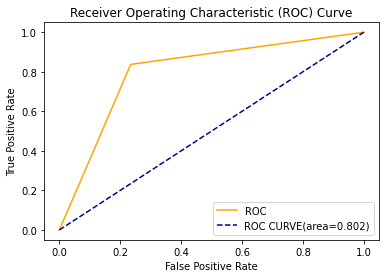

In [108]:
plt.plot(fpr,tpr,color='orange',label='ROC')
plt.plot([0,1],[0,1],color='darkblue',linestyle='--',label="ROC CURVE(area=%0.3f)"% auc)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic (ROC) Curve")
plt.legend()
plt.show()

# saving the file

In [109]:
import joblib
joblib.dump(lr,'ProjectRedWine.pkl')

['ProjectRedWine.pkl']